In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

### Problem 1-b1
Provided scheme, first-order

In [ ]:
''' Assumed values and initial conditions. '''
# Phytoplankton growth rate
gamma = 0.1
# Water inflow rate
S = gamma/10
# Initial nutrient concentration
N_0 = 1

''' Loop controls. '''
# Maximum time
t_max = 200/gamma
# Time step
dt = 0.1/gamma
# Loop step number
n = 0

''' Initialize arrays. '''
# Initialize nutrient concentration array
N = [0.5*N_0]
# Initialize phytoplankton concentration array
P = [0.5*N_0]
# Initialize time array
t = np.linspace(0, t_max, int(t_max/dt)+1)

''' Run loop. '''
# While (step number * time step) is leq the maximum time
while n*dt < t_max:
    N_n1 = (N_0*N[n] + S*dt*N_0**2)/(N_0 + S*dt*N_0 + gamma*P[n]*dt)
    P_n1 = (N_0*P[n] + gamma*P[n]*N_n1*dt)/(N_0 + S*dt*N_0)
    # print('Step num: {0} | Time: {1:7.2f} | N(n): {2:7.3f} | P(n)$: {3:7.3f} | N(n+1): {4:7.3f} | P(n+1)$: {5:7.3f}'.format(n, n*dt, N[n], P[n], N_n1, P_n1))
    N.append(N_n1)
    P.append(P_n1)
    n += 1

''' Plotting. '''
fig, ax = plt.subplots(figsize=(4, 4))

ax.plot(t, N, marker='o', label='N')
ax_ = ax.twinx()
ax_.plot(t, P, marker='o', c='tab:green', label='P')

labelpad = 15
ax.set_xlabel('Time', labelpad=labelpad)
ax.set_ylabel('Nutrient concentration', labelpad=labelpad)
ax_.set_ylabel('Phytoplankton concentration', labelpad=labelpad+5, rotation=270)
ax.set_xscale('log')

fig.legend(frameon=False, ncol=2, bbox_to_anchor=(0.7, 1))
fig.suptitle('$\Delta$t = {0:.2f} / $\gamma$'.format(dt*gamma), y=1.05);
fig.tight_layout() 
plt.savefig('figs/p1b1a.png', dpi=300)

# Remove arrays from memory
del N, P, n, N_n1, P_n1

### Problem 1-b2

In [ ]:
def given(gamma, N_0, t_max, dt):
    ''' Method for the scheme in 1-b1. '''
    
    ' Assumed values and initial conditions. '
    # Water inflow rate
    S = gamma/10
    # Initial nutrient concentration
    N_0 = 1

    ' Loop controls. '
    # Maximum time
    t_max = t_max/gamma
    # Time step
    dt = dt/gamma
    # Loop step number
    n = 0

    ' Initialize arrays. '
    # Initialize nutrient concentration array
    N = [0.5*N_0]
    # Initialize phytoplankton concentration array
    P = [0.5*N_0]
    # Initialize time array
    t = np.linspace(0, t_max, int(t_max/dt)+1)

    ' Run loop. '
    # While (step number * time step) is leq the maximum time
    while n*dt < t_max:
        N_n1 = (N_0*N[n] + S*dt*N_0**2)/(N_0 + S*dt*N_0 + gamma*P[n]*dt)
        P_n1 = (N_0*P[n] + gamma*P[n]*N_n1*dt)/(N_0 + S*dt*N_0)
        # print('Step num: {0} | Time: {1:7.2f} | N(n): {2:7.3f} | P(n)$: {3:7.3f} | N(n+1): {4:7.3f} | P(n+1)$: {5:7.3f}'.format(n, n*dt, N[n], P[n], N_n1, P_n1))
        N.append(N_n1)
        P.append(P_n1)
        n += 1
        
    return N, P

In [ ]:
def custom(gamma, N_0, t_max, dt, plot=False):
    ''' Second-order Heun. '''
    
    ' Assumed values and initial conditions. '
    # Water inflow rate
    S = gamma/10
    # Initial nutrient concentration
    N_0 = 1

    ' Loop controls. '
    # Maximum time
    t_max = t_max/gamma
    # Time step
    dt = dt/gamma
    # Loop step number
    n = 0

    ' Initialize arrays. '
    # Initialize nutrient concentration array
    N = [0.5*N_0]
    # Initialize phytoplankton concentration array
    P = [0.5*N_0]
    # Initialize time array
    t = np.linspace(0, t_max, int(t_max/dt)+1)
    
    ' Derivative functions. '
    def N_(gamma, N_0, p, n, S):
        return S*N_0 - (S + gamma*p/N_0)*n
    def N__(gamma, N_0, p, n, S):
        # return -S*N_(gamma, N_0, p, n, S) - (gamma/N_0)*(P_(gamma, N_0, p, n, S)*n + p*N_(gamma, N_0, p, n, S))
        return -S*N_(gamma, N_0, p, n, S) - (gamma/N_0)*(P_(gamma, N_0, p, n, S)*n + p*N_(gamma, N_0, p, n, S))
    def P_(gamma, N_0, p, n, S):
        return (gamma/N_0)*p*n - S*p
    def P__(gamma, N_0, p, n, S):
        return (gamma/N_0)*(P_(gamma, N_0, p, n, S)*n - p*N_(gamma, N_0, p, n, S)) - S*P_(gamma, N_0, p, n, S) 
        
    ' Run loop. '
    # While (step number * time step) is leq the maximum time
    while n*dt < t_max:
        S = gamma/10
        N_n1 = N[n] + dt*N_(gamma, N_0, P[n], N[n], S) + ((dt**2)/2)*N__(gamma, N_0, P[n], N[n], S)
        P_n1 = P[n] + dt*P_(gamma, N_0, P[n], N[n], S) + ((dt**2)/2)*P__(gamma, N_0, P[n], N[n], S)
        # N_n1 = N[n]*(1 + dt*(gamma-S) + (1/2)*(dt**2/2)*(gamma-S)**2)
        # P_n1 = P[n]*(1 + dt*(gamma-S) + (1/2)*(dt**2/2)*(gamma-S)**2)
        
        # print('Step num: {0} | Time: {1:7.2f} | N(n): {2:7.3f} | P(n)$: {3:7.3f} | N(n+1): {4:7.3f} | P(n+1)$: {5:7.3f}'.format(n, n*dt, N[n], P[n], N_n1, P_n1))
        N.append(N_n1)
        P.append(P_n1)
        n += 1
    
    ''' Plotting. '''
    if plot:
        fig, ax = plt.subplots(figsize=(4, 4))
        ax.plot(t, N, marker='o', label='N')
        ax_ = ax.twinx()
        ax_.plot(t, P, marker='o', c='tab:green', label='P')
        ax.set_xscale('log')

        labelpad = 15
        ax.set_xlabel('Time', labelpad=labelpad)
        ax.set_ylabel('Nutrient concentration', labelpad=labelpad)
        ax_.set_ylabel('Phytoplankton concentration', labelpad=labelpad+5, rotation=270)

        fig.legend(frameon=False, ncol=2, bbox_to_anchor=(0.675, 1))
        fig.suptitle('$\Delta$t = {0:.2f} / $\gamma$'.format(dt * gamma), y=1.05);
        plt.savefig('figs/p1ca.png', dpi=300)
        
    return N, P

    # Remove arrays from memory
    del N, P, n, N_n1, P_n1

Run the custom scheme and generate plots.

In [ ]:
''' Assumed values and initial condit'ions. '''
# Phytoplankton growth rate
gamma = 0.1
# Initial nutrient concentration
N_0 = 1
# Time step
dt = 0.1
# Maximum time
t_max = 200/gamma

_, _ = custom(gamma, N_0, t_max, dt, plot=True)

### Problem 1-b4
Compare scheme performance over a range of timesteps.

In [ ]:
''' Assumed values and initial conditions. '''
# Phytoplankton growth rate
gamma = 0.1
# Initial nutrient concentration
N_0 = 1

''' Exercise-specific parameters. '''
# Define solutions
N_final, P_final = 0.1, 0.9
# Define timestep coefficients
dts = [0.01, 0.1, 0.5, 1, 2, 2]
# Define maximum runtime
t_max = 2

# Initialize arrays to hold errors for given (g) and scheme (s)
g = {'N': {}, 'P': {}}
s = {'N': {}, 'P': {}}

# Iterate over timesteps:
for dt_ in dts:
    # Calculate results from each scheme
    N_given, P_given = given(gamma, N_0, t_max, dt_)
    N_scheme, P_scheme = custom(gamma, N_0, t_max, dt_)
    
    # Uncomment to check in on results
    # print('\t N(given): {0:8.3f} | P(given): {1:8.3f} | N(scheme): {2:8.3f} | P(scheme): {3:8.3f} '.format(N_given[-1], P_given[-1], N_scheme[-1], P_scheme[-1]))
    
    # Calculate relative errors for future plotting
    g['N']['{0}'.format(dt_)] = (np.abs(np.array(N_given) - N_final)/N_final)
    g['P']['{0}'.format(dt_)] = (np.abs(np.array(P_given) - P_final)/P_final)
    s['N']['{0}'.format(dt_)] = (np.abs(np.array(N_scheme) - N_final)/N_final)
    s['P']['{0}'.format(dt_)] = (np.abs(np.array(P_scheme) - P_final)/P_final)

''' Plot. '''
fig, axs = plt.subplots(figsize=(7, 3), ncols=len(dts)-1, nrows=1, sharey=True)
for i, ax in enumerate(fig.axes):
    ax.plot(g['N']['{0}'.format(dts[i])], label='b1', marker='o')
    ax.plot(s['N']['{0}'.format(dts[i])], label='a1', marker='^')
    ax.legend(frameon=False)
    ax.set_title('$\Delta t$ = {0:.3f} / $\gamma$'.format(dts[i]), fontsize=10)
fig.tight_layout()

plt.savefig('figs/p1b4a.png', bbox_inches='tight')

### Problem 2a
Use solver to identify the coefficients that generate a 4th-order accurate approximation.

In [1]:
from sympy import *
h = Symbol('h')
# Define the matrix system
A = Matrix([[0, 1, 1, 0],
            [1, -(1/2)*h, (1/2)*h, 1], 
            [-h, (1/8)*h**2, (1/8)*h**2, h],
            [(1/2)*h**2, -(1/48)*h**3, (1/48)*h**3, (1/2)*h**2]])
B = Matrix([0, 1, 0, 0])
# Solve the linear system
system = A, B
linsolve(system)

{(-0.0454545454545455, -1.09090909090909/h, 1.09090909090909/h, -0.0454545454545455)}

Check the coefficient values to ensure they satisfy the system of equations.

In [ ]:
a, b, c, d = 1/22, 12/11, -12/11, 1/22

# '
print('1st-order: {0:.3f}'.format(a - (1/2)*b + (1/2)*c + d))
# ''
print('2nd-order: {0:.3f}'.format(-a + (1/8)*b + (1/8)*c + d))
# '''
print('3rd-order: {0:.3f}'.format((1/2)*a - (1/48)*b + (1/48)*c + (1/2)*d))
# ''''
print('4th-order: {0:.3f}'.format(-(1/6)*a + (1/384)*b + (1/384)*c + (1/6)*d))
# '''''
print('5th-order: {0:.3f}'.format((1/24)*a - (1/3840)*b + (1/3840)*c + (1/24)*d))

### Problem 2b
Calculate the exact and approximate solutions, and plot them.

In [3]:
def advection(c, x, dx, t, k):
    w = c*k
    return np.exp(1j*(k*x - w*t))

In [4]:
def psi_2(k, x, w, t):
    ''' Psi term for Problem 2.'''
    return np.exp(1j*(k*x - w*t))

def psi_2p(k, x, w, t):
    ''' Psi' term for Problem 2.'''
    return 1j*k*np.exp(1j*(k*x - w*t))

def approx(c, dx, k, t, x):
    # 4th-order dispersion relation (Durran, page 102 under Equation 3.33)
    w_4c = (c/dx)*((4/3)*np.sin(k*dx) - (1/6)*np.sin(2*k*dx))
    # Result (psi'_j)
    res = -psi_2p(k, x-dx, w_4c, t)/22 - (12/(11*dx))*psi_2(k, x-dx/2, w_4c, t) + (12/(11*dx))*psi_2(k, x+dx/2, w_4c, t) - psi_2p(k, x+dx, w_4c, t)/22
    return res, w_4c

/var/folders/98/_d8bjg_j2p58806pn5mtq77r0000gn/T/ipykernel_39412/1239181686.py:26: RuntimeWarning: invalid value encountered in double_scalars
  ratio.append(np.abs(np.real(psi_approx)[N//2])/np.abs(np.real(psi)[N//2]))


"\nfig, ax = plt.subplots(figsize=(4, 4))\nmarkers = ['o', '^', 'x', '1', 's', '+', 'D', 'P']\ncolors = [plt.cm.get_cmap('Paired')(i) for i in np.linspace(0, 1, len(markers))]\nfor j, n in enumerate(ns):\n    k = 2*np.pi*n/L\n    # Scatter plot\n    psi = advection(c, x, dx, t, k)\n    ax.scatter(x, psi, label='Wavenumber {0}'.format(j), c=colors[j], s=20, marker=markers[j])\n    if j != 0:\n        ks.append(k)\n        w_exact.append(c*k)\n    # Line plot with higher resolution\n    x_ = np.linspace(0, L, N*10)\n    psi = advection(c, x_, dx, t, k)\n    ax.plot(x_, psi, c=colors[j], lw=0.5)\n    ax.set_xlim([0, L])\n\nfig.suptitle('{0} points, {1} unique nonzero modes'.format(N, N//2), y=0.95)\n    \nfig.legend(frameon=False, bbox_to_anchor=(0.925, 0.925), loc='upper left')\n"

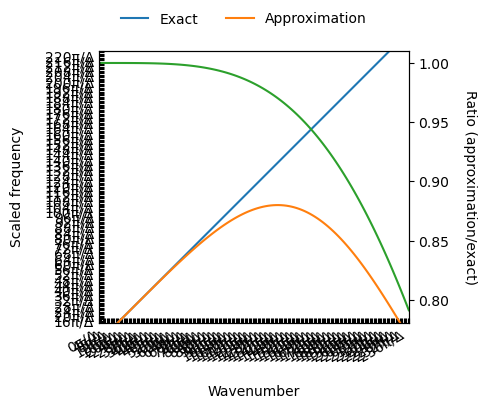

In [11]:
' Define domain parameters. '
N = 240 # Number of grid points
L = 1 # Length of domain
x = np.linspace(0, L, N) # Generate stencil
dx = L/N # Derive the grid spacing
dt = 1/dx # Define a time step to render a CFL of 1
c = dx*dt # Calculate CFL
ns = np.arange(0, N//2, 1, dtype=int) # Define wavenumber integers
t = 0 # Sample time of evaluation

# Store wavenumbers and frequencies (exact and approximate)
ks, w_exact, w_approx, ratio = [], [], [], []
# Iterate over wavenumber integers and extract frequencies
for _, n in enumerate(ns):
    # Define wavenumber
    k = 2*np.pi*n/L
    # Exact solution
    psi = psi_2p(k, x, c*k, t)
    # Approximation
    psi_approx, w_ = approx(c, dx, k, t, x)
    # Storage
    ks.append(k)
    w_exact.append(c*k)
    w_approx.append(w_)
    
    ratio.append(np.abs(np.real(psi_approx)[N//2])/np.abs(np.real(psi)[N//2]))
    
' Plotting. '
fig, ax = plt.subplots(figsize=(4, 4))
labelpad = 15
ax.plot(ks, np.array(w_exact)/c, label='Exact')
ax.plot(ks, np.array(w_approx)/c, label='Approximation')
ax_ = ax.twinx()
ax_.plot(ks, ratio, color='tab:green')
ax.set_xlabel('Wavenumber', labelpad=labelpad)
ax.set_ylabel('Scaled frequency', labelpad=labelpad)
ax_.set_ylabel('Ratio (approximation/exact)', rotation=270, labelpad=labelpad+5)

ax.set_xticks([i*np.pi for i in range(0, N-1)])
ax.set_yticks([i*np.pi for i in range(0, N-1)])

ax.set_xticklabels(['{0}π/Δ'.format(i) if i % 4 == 0 else '' for i in range(0, len(ax.get_xticks()))])
ax.set_yticklabels(['{0}π/Δ'.format(i) if i % 4 == 0 else '' for i in range(0, len(ax.get_yticks()))])

ax.tick_params(axis='both', direction='in')
ax.set_xlim([0, max(ks)])
ax.set_ylim([0, max(np.array(w_exact)/c)])
ax.set_aspect('equal')

fig.legend(frameon=False, ncol=2, loc='upper center')
fig.autofmt_xdate()

plt.savefig('figs/p2.png', dpi=300, bbox_inches='tight')

' Plot wavenumbers over domain. '
'''
fig, ax = plt.subplots(figsize=(4, 4))
markers = ['o', '^', 'x', '1', 's', '+', 'D', 'P']
colors = [plt.cm.get_cmap('Paired')(i) for i in np.linspace(0, 1, len(markers))]
for j, n in enumerate(ns):
    k = 2*np.pi*n/L
    # Scatter plot
    psi = advection(c, x, dx, t, k)
    ax.scatter(x, psi, label='Wavenumber {0}'.format(j), c=colors[j], s=20, marker=markers[j])
    if j != 0:
        ks.append(k)
        w_exact.append(c*k)
    # Line plot with higher resolution
    x_ = np.linspace(0, L, N*10)
    psi = advection(c, x_, dx, t, k)
    ax.plot(x_, psi, c=colors[j], lw=0.5)
    ax.set_xlim([0, L])

fig.suptitle('{0} points, {1} unique nonzero modes'.format(N, N//2), y=0.95)
    
fig.legend(frameon=False, bbox_to_anchor=(0.925, 0.925), loc='upper left')
'''

Sample plot for a given wavenumber.

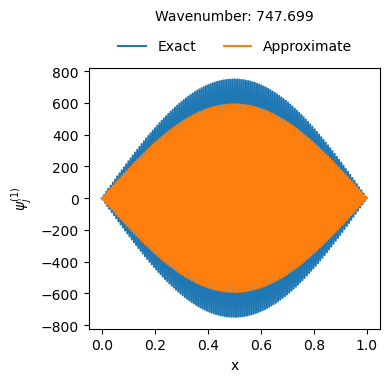

In [12]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(x, psi, label='Exact')
ax.plot(x, psi_approx, label='Approximate')
ax.set_ylabel('$\psi_j^{(1)}$')
ax.set_xlabel('x')
fig.legend(frameon=False, ncol=2, loc='upper center', bbox_to_anchor=(0.6, 0.9), fontsize=10)
ax.set_title('Wavenumber: {0:.3f}'.format(k), fontsize=10, y=1.15)
fig.tight_layout()
plt.savefig('figs/p2_psi.png', dpi=300)